In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [6]:
raw_data = Path('/Volumes/krauss/Lisa/GMR/Array/SpecialBox/Cuthbert/250708/results/communicating_results.csv')

In [23]:
df = pd.read_csv(raw_data)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
df.head()

,ROI-label,Analysis-method,amplitude,mu,sigma,offset,error
timestamp,,,,,,,
2025-07-08 11:03:56.934713,001A_N,gaussian,158.727,59.728,44.129,3.712,12.506
2025-07-08 11:03:56.934713,001A_S,gaussian,145.184,92.841,36.831,1.073,11.840
2025-07-08 11:03:56.934713,007A_N,gaussian,158.171,97.198,42.991,1.656,12.587
2025-07-08 11:03:56.934713,007A_S,gaussian,140.905,84.989,45.851,0.219,17.838
2025-07-08 11:03:56.934713,104A_N,gaussian,114.805,82.161,28.000,4.678,21.678


In [24]:
rois = df["ROI-label"].unique()
rois = list(set([roi[:-2] for roi in rois]))
print(rois)

['001B', '197B', '104A', '198A', '190B', '007A', '001A', '007B', '190A', '104B']


In [26]:
comb_df = pd.DataFrame()
suffix = ['_N', '_S']

for roi in rois:
    df_N = df[df["ROI-label"] == f"{roi}{suffix[0]}"]["mu"]
    df_S = df[df["ROI-label"] == f"{roi}{suffix[1]}"]["mu"]
    comb_df[roi] = df_N + df_S
comb_df.head()

,001B,197B,104A,198A,190B,007A,001A,007B,190A,104B
timestamp,,,,,,,,,,
2025-07-08 11:03:56.934713,91.814,190.473,194.276,263.722,85.941,182.187,152.569,85.441,168.888,118.307
2025-07-08 11:04:15.786674,88.203,189.157,194.838,260.504,88.972,176.915,154.952,90.774,173.695,117.747
2025-07-08 11:04:34.532036,90.768,191.776,195.801,257.773,105.870,180.240,156.611,84.567,169.848,116.204
2025-07-08 11:04:53.277659,109.958,189.988,192.566,261.909,106.120,181.560,154.295,84.592,170.963,119.970
2025-07-08 11:05:12.016549,88.734,191.825,195.812,257.593,100.460,187.882,153.543,86.708,173.000,111.889


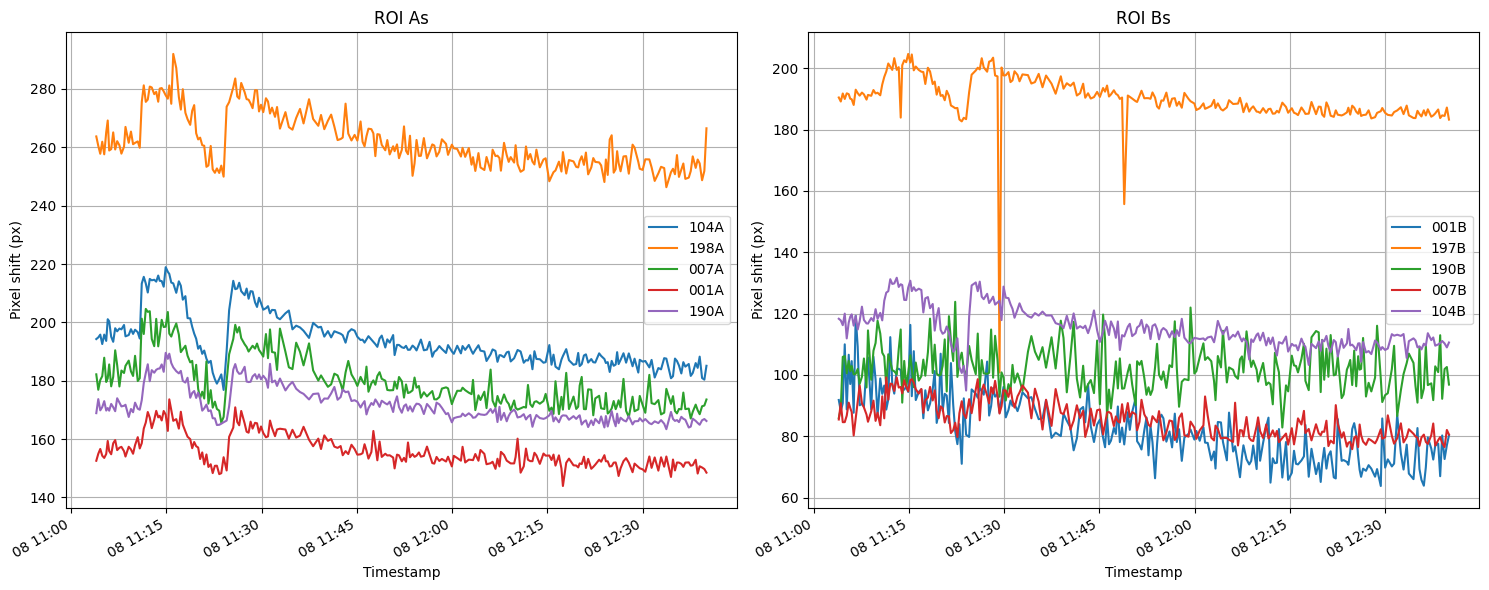

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

comb_df.loc[:, comb_df.columns.str.contains('A')].plot(
    kind='line',
    ax=ax[0],
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

comb_df.loc[:, comb_df.columns.str.contains('B')].plot(
    kind='line',
    ax=ax[1],
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

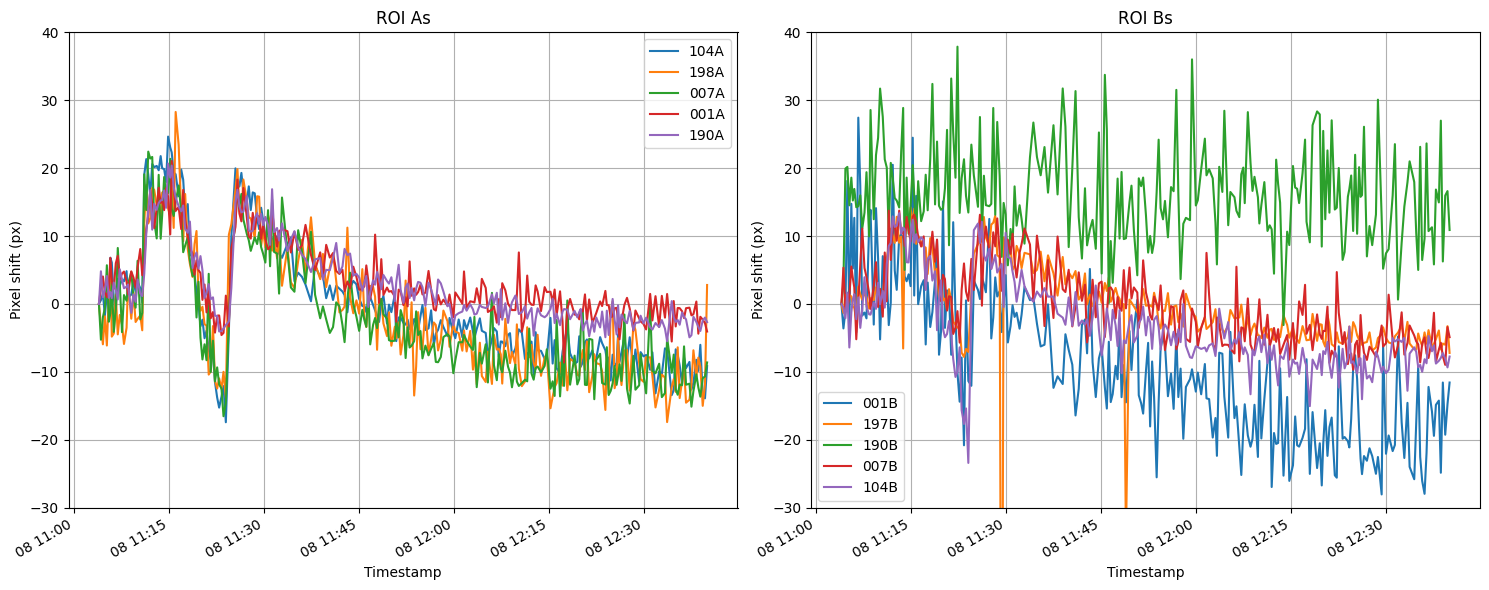

In [45]:
normalized_df = comb_df - comb_df.iloc[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

normalized_df.loc[:, normalized_df.columns.str.contains('A')].plot(
    kind='line',
    ylim=(-30, 40),
    ax=ax[0],
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

normalized_df.loc[:, normalized_df.columns.str.contains('B')].plot(
    kind='line',
    ylim=(-30, 40),
    ax=ax[1],
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

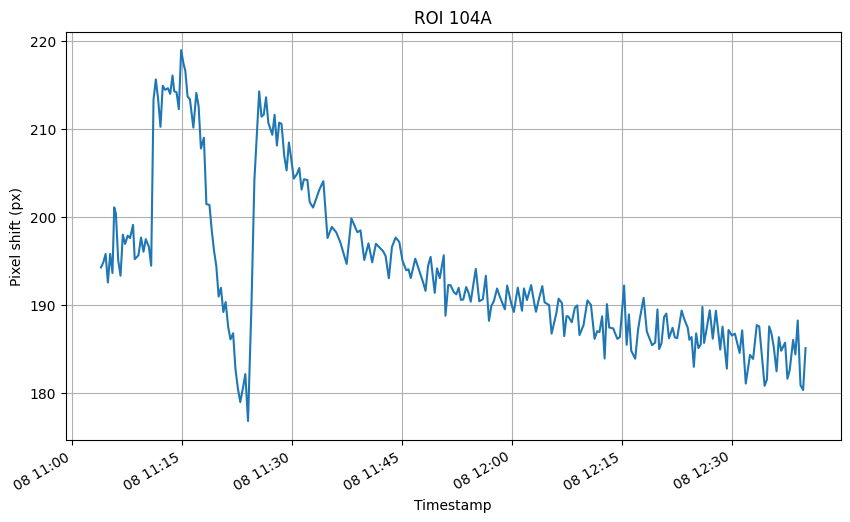

In [34]:
label = "104A"

comb_df[label].plot(
    kind='line',
    figsize=(10, 6),
    title=f'ROI {label}',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

plt.grid(True) # Add a grid for better readability
plt.show()